In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import re
import datetime as dt
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
jobs_df = pd.read_csv('fullsample.csv')

In [3]:
jobs_df.head()

,JOBID,STATE,BEGIN,END,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,PARTITION,EXITCODE
0,30616928,RUNNING,2021-07-31T22:15:00,Unknown,2048Mn,0,10:04:00,67-22:14:22,1,1,production,0:0
1,30853133,COMPLETED,2021-08-06T11:36:09,2021-09-05T11:36:32,262144Mn,20604.62M,30-00:00:00,30-00:00:23,1,1,cgw-platypus,0:0
2,30858137,COMPLETED,2021-08-06T19:04:39,2021-09-05T19:04:53,204800Mn,57553.77M,30-00:00:00,30-00:00:14,1,32,cgw-tbi01,0:0
3,30935078,COMPLETED,2021-08-09T16:52:51,2021-09-07T20:52:55,65536Mn,20577.96M,29-04:00:00,29-04:00:04,1,8,cgw-platypus,0:0
4,31364111_2,COMPLETED,2021-08-17T07:45:07,2021-09-10T16:45:24,16384Mn,9733.43M,24-09:00:00,24-09:00:17,1,1,production,0:0


In [4]:
jobs_df['BEGIN'] = pd.to_datetime(jobs_df['BEGIN'],
                                  format = '%Y-%m-%dT%H:%M:%S',
                                  errors = 'coerce' )
jobs_df['END'] = pd.to_datetime(jobs_df['END'],
                               format = '%Y-%m-%dT%H:%M:%S',
                               errors = 'coerce')

In [5]:
jobs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7395885 entries, 0 to 7395884
Data columns (total 12 columns):
 #   Column     Dtype         
---  ------     -----         
 0   JOBID      object        
 1   STATE      object        
 2   BEGIN      datetime64[ns]
 3   END        datetime64[ns]
 4   REQMEM     object        
 5   USEDMEM    object        
 6   REQTIME    object        
 7   USEDTIME   object        
 8   NODES      int64         
 9   CPUS       int64         
 10  PARTITION  object        
 11  EXITCODE   object        
dtypes: datetime64[ns](2), int64(2), object(8)
memory usage: 677.1+ MB


In [6]:
jobs_df.columns = jobs_df.columns.str.lower()

In [7]:
jobs_df.head()

,jobid,state,begin,end,reqmem,usedmem,reqtime,usedtime,nodes,cpus,partition,exitcode
0,30616928,RUNNING,2021-07-31 22:15:00,NaT,2048Mn,0,10:04:00,67-22:14:22,1,1,production,0:0
1,30853133,COMPLETED,2021-08-06 11:36:09,2021-09-05 11:36:32,262144Mn,20604.62M,30-00:00:00,30-00:00:23,1,1,cgw-platypus,0:0
2,30858137,COMPLETED,2021-08-06 19:04:39,2021-09-05 19:04:53,204800Mn,57553.77M,30-00:00:00,30-00:00:14,1,32,cgw-tbi01,0:0
3,30935078,COMPLETED,2021-08-09 16:52:51,2021-09-07 20:52:55,65536Mn,20577.96M,29-04:00:00,29-04:00:04,1,8,cgw-platypus,0:0
4,31364111_2,COMPLETED,2021-08-17 07:45:07,2021-09-10 16:45:24,16384Mn,9733.43M,24-09:00:00,24-09:00:17,1,1,production,0:0


In [8]:
jobs_df['reqmem_unit'] = jobs_df['reqmem'].str.extract(r'\d+(\w+)')
jobs_df['reqmem'] = jobs_df['reqmem'].str.replace('\D+','')

<ipython-input-8-20ed4692ae5f>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  jobs_df['reqmem'] = jobs_df['reqmem'].str.replace('\D+','')


In [9]:
jobs_df[jobs_df['reqmem_unit'] == 'Mc']['reqmem'].nunique()

58

In [10]:
jobs_df['reqmem'] = jobs_df['reqmem'].astype(int)

In [11]:
#Ask if this is correct

jobs_df['reqmem'] = np.where(jobs_df['reqmem_unit'] == 'Mn', jobs_df['reqmem']*jobs_df['nodes']/jobs_df['cpus'], jobs_df['reqmem'])

In [12]:
jobs_df.head()

,jobid,state,begin,end,reqmem,usedmem,reqtime,usedtime,nodes,cpus,partition,exitcode,reqmem_unit
0,30616928,RUNNING,2021-07-31 22:15:00,NaT,2048.0,0,10:04:00,67-22:14:22,1,1,production,0:0,Mn
1,30853133,COMPLETED,2021-08-06 11:36:09,2021-09-05 11:36:32,262144.0,20604.62M,30-00:00:00,30-00:00:23,1,1,cgw-platypus,0:0,Mn
2,30858137,COMPLETED,2021-08-06 19:04:39,2021-09-05 19:04:53,6400.0,57553.77M,30-00:00:00,30-00:00:14,1,32,cgw-tbi01,0:0,Mn
3,30935078,COMPLETED,2021-08-09 16:52:51,2021-09-07 20:52:55,8192.0,20577.96M,29-04:00:00,29-04:00:04,1,8,cgw-platypus,0:0,Mn
4,31364111_2,COMPLETED,2021-08-17 07:45:07,2021-09-10 16:45:24,16384.0,9733.43M,24-09:00:00,24-09:00:17,1,1,production,0:0,Mn


In [13]:
jobs_df[jobs_df['reqmem_unit'] == 'Mc']['reqmem'].nunique()

58

In [14]:
jobs_df['usedmem'] = jobs_df['usedmem'].str.replace(r'\D+','')

<ipython-input-14-f0b213c0b286>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  jobs_df['usedmem'] = jobs_df['usedmem'].str.replace(r'\D+','')


In [15]:
#divided by 100 to keep decimals.
jobs_df['usedmem'] = jobs_df['usedmem'].astype(int)/100

In [16]:
jobs_df['usedmem']

0              0.00
1          20604.62
2          57553.77
3          20577.96
4           9733.43
             ...   
7395880        0.09
7395881      187.92
7395882      803.97
7395883        0.09
7395884      886.06
Name: usedmem, Length: 7395885, dtype: float64

In [17]:
jobs_df['usedmem'] = (jobs_df['usedmem']*jobs_df['nodes'])/jobs_df['cpus']

In [44]:
jobs_df[jobs_df['state'] == 'CANCELLED']

,jobid,state,begin,end,reqmem,usedmem,reqtime,usedtime,nodes,cpus,partition,exitcode,reqmem_unit
42,31669402,CANCELLED,2021-08-28 10:53:59,2021-09-05 10:53:57,58982.4,4706.7750,8-00:00:00,7-23:59:58,9,10,production,0:15,Mn
1023,31798622,CANCELLED,2021-08-31 02:46:09,2021-09-05 02:46:09,40960.0,1440.9500,5-00:00:00,5-00:00:00,4,4,turing,0:15,Mn
1029,31798672,CANCELLED,2021-08-31 02:53:48,2021-09-05 02:54:09,40960.0,1438.4600,5-00:00:00,5-00:00:21,4,4,turing,0:15,Mn
1212,31807053,CANCELLED,2021-08-31 09:28:28,2021-09-01 08:10:32,16384.0,11784.1900,2-00:00:00,22:42:04,1,1,production,0:9,Mn
1380,31810464,CANCELLED,2021-08-31 11:25:20,2021-09-01 00:31:51,40960.0,36820.6100,1-00:00:00,13:06:31,1,1,turing,0:9,Mn
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7387593,25469985_5,CANCELLED,2020-10-30 13:45:59,2020-10-31 13:46:06,2048.0,1242.3825,1-00:00:00,1-00:00:07,1,4,production,0:15,Mn
7387594,25469985_6,CANCELLED,2020-10-30 13:45:57,2020-10-31 13:46:06,2048.0,1244.1925,1-00:00:00,1-00:00:09,1,4,production,0:15,Mn
7387595,25469985_7,CANCELLED,2020-10-30 13:45:59,2020-10-31 13:46:06,2048.0,1238.6350,1-00:00:00,1-00:00:07,1,4,production,0:15,Mn
7387596,25469985_8,CANCELLED,2020-10-30 13:45:59,2020-10-31 13:46:06,2048.0,1237.9700,1-00:00:00,1-00:00:07,1,4,production,0:15,Mn


In [19]:
avg_hourly_jobs = jobs_df[jobs_df['state'] != 'CANCELLED'].groupby([jobs_df['begin'].dt.month,jobs_df['begin'].dt.day,jobs_df['begin'].dt.hour])[['reqmem','usedmem']].mean()

In [20]:
avg_hourly_jobs = pd.DataFrame(avg_hourly_jobs)
avg_hourly_jobs.index.names = ['month','day','hour']
avg_hourly_jobs

reqmem      usedmem
month day  hour                          
1.0   1.0  0.0   5381.290123   425.890624
           1.0   2511.173935  1731.691641
           2.0   3310.227119  1644.317699
           3.0   4299.222222   837.592025
           4.0   4698.638889  1798.348476
...                      ...          ...
12.0  31.0 19.0  5639.661406   889.554290
           20.0  5201.291667  1433.239044
           21.0  6430.149032   670.893662
           22.0  6360.390873   503.430684
           23.0  5534.311987   634.473729

[8756 rows x 2 columns]

In [21]:
print(jobs_df['begin'].min(),jobs_df['begin'].max())

2020-10-01 00:03:08 2021-10-07 20:39:26


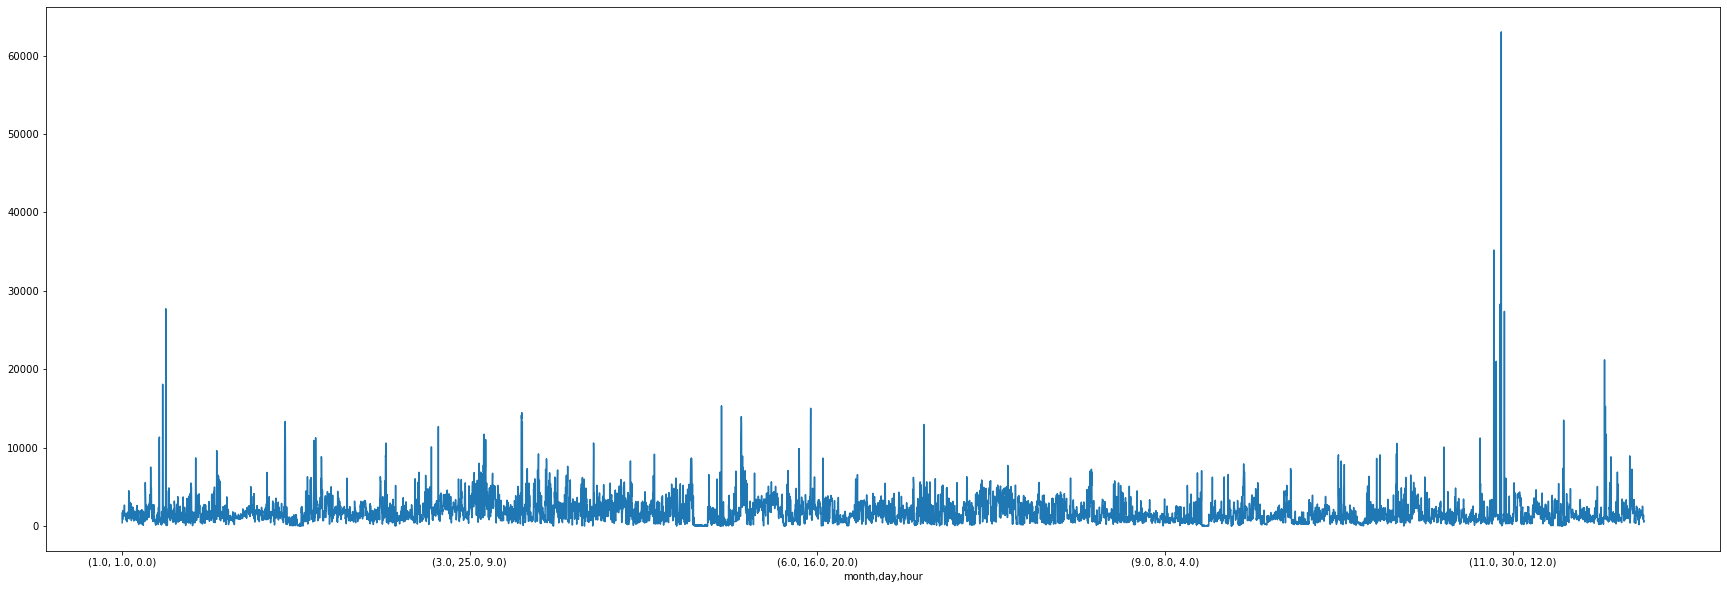

In [22]:
ax = avg_hourly_jobs['usedmem'].plot(figsize = (30,10))

In [45]:
cancelled_hourly = jobs_df[jobs_df['state'] == 'CANCELLED'].groupby([jobs_df['begin'].dt.month,jobs_df['begin'].dt.day,jobs_df['begin'].dt.hour])['usedmem'].mean()

In [46]:
cancelled_hourly = pd.DataFrame(cancelled_hourly)
cancelled_hourly

usedmem
begin begin begin             
1.0   1.0   9.0       0.000000
            15.0      2.685000
            19.0      0.000000
            21.0      2.683125
      3.0   13.0      3.055000
...                        ...
12.0  29.0  5.0       0.000000
      30.0  12.0    100.435000
            13.0      0.000000
            16.0      1.050000
      31.0  10.0   1390.940000

[2250 rows x 1 columns]

<AxesSubplot:xlabel='begin,begin,begin'>

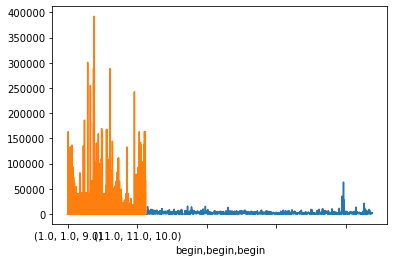

In [52]:
jobs_count_per_hour = jobs_df[jobs_df['state'] != 'CANCELLED'].groupby([jobs_df['begin'].dt.month,jobs_df['begin'].dt.day,jobs_df['begin'].dt.hour])['jobid'].count()

In [53]:
jobs_count_per_hour = pd.DataFrame(jobs_count_per_hour)

In [54]:
jobs_count_per_hour

jobid
begin begin begin       
1.0   1.0   0.0      243
            1.0      665
            2.0     1180
            3.0      132
            4.0      144
...                  ...
12.0  31.0  19.0     396
            20.0     201
            21.0     241
            22.0     357
            23.0     203

[8756 rows x 1 columns]

In [55]:
#is this the correct way to get average jobs per hour?
jobs_count_per_hour['jobid'].mean()

843.5800593878483

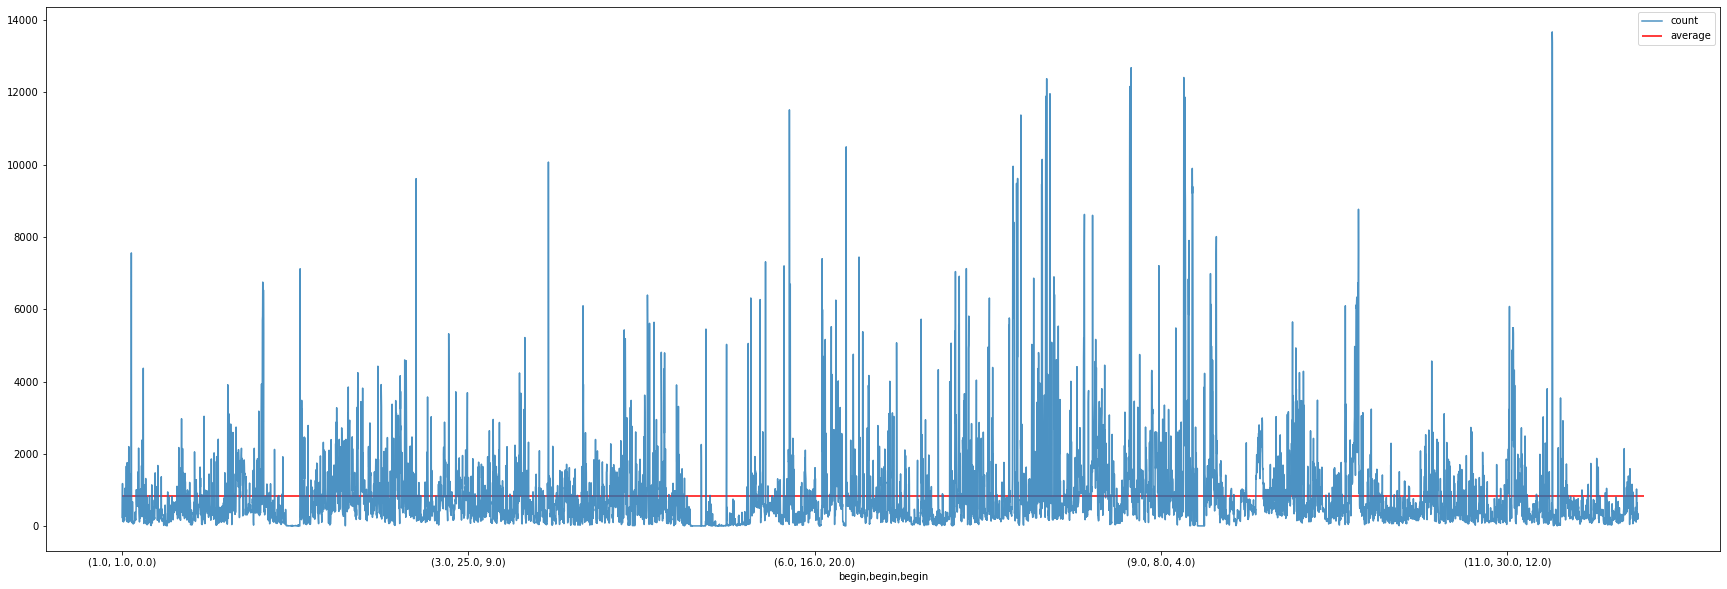

In [76]:
ax = jobs_count_per_hour.plot(figsize = (30,10), alpha = 0.8)
ax.hlines(jobs_count_per_hour['jobid'].mean(),0,8790, color = 'red')
ax.legend(['count','average'])